# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.51'

### Load in the data

In [3]:
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.436888,1048.898738,0.897797
1,FI2,0.417796,1015.924767,0.831850
2,FI4,0.459045,1041.589916,0.883180
3,FI5,0.493865,1034.935183,0.869870
4,FI7,0.482227,1034.820102,0.869640


## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end

### Lets do a silly example first just using a single FI so you can see what its doing
- If you use plot_figure=True, it will plot the resulting distributions. 

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.563812,1.563246,0.069334,5.904072,5.901935,0.261765,50,0,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.425904,1.426646,0.064918,5.383411,5.386210,0.245094,50,0,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.678794,1.680001,0.074340,6.338181,6.342739,0.280668,50,0,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.868371,1.869009,0.082108,7.053917,7.056327,0.309994,50,0,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.799963,1.802266,0.080633,6.795646,6.804343,0.304425,50,0,0.0,1307.970102,0.482227,None,2700,SW96


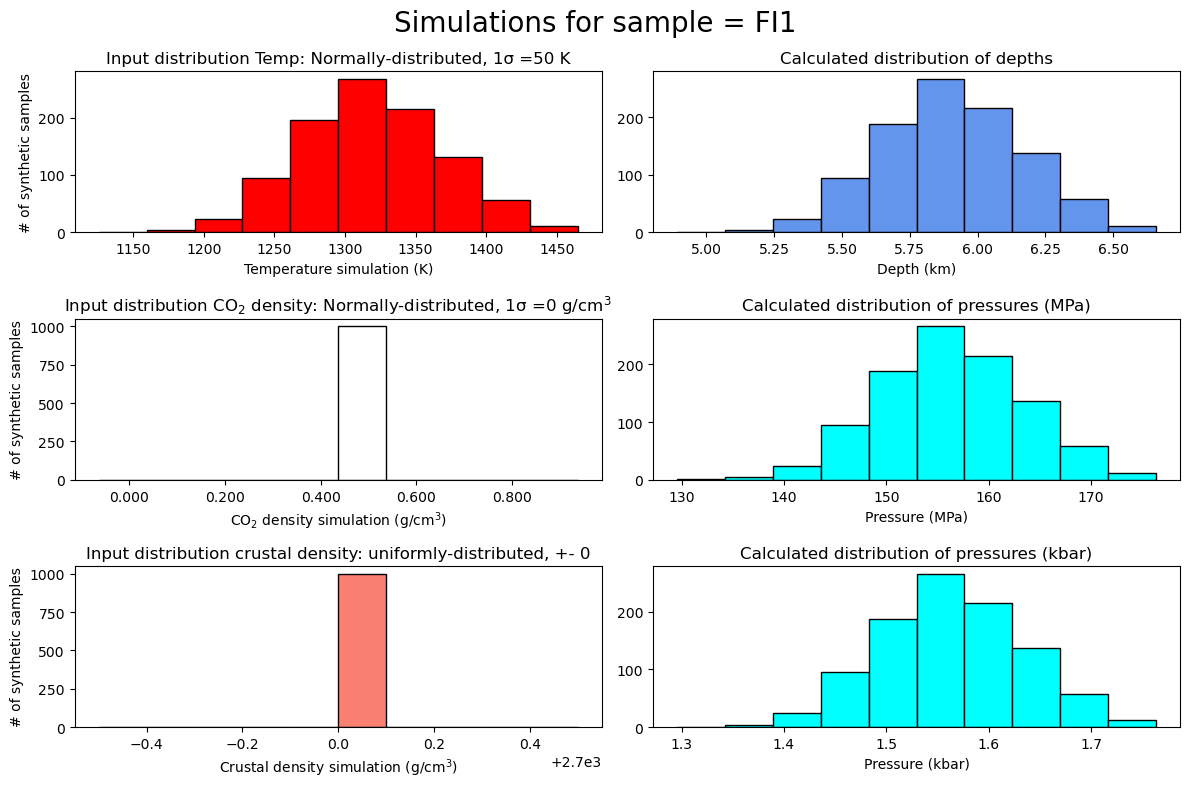

In [4]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

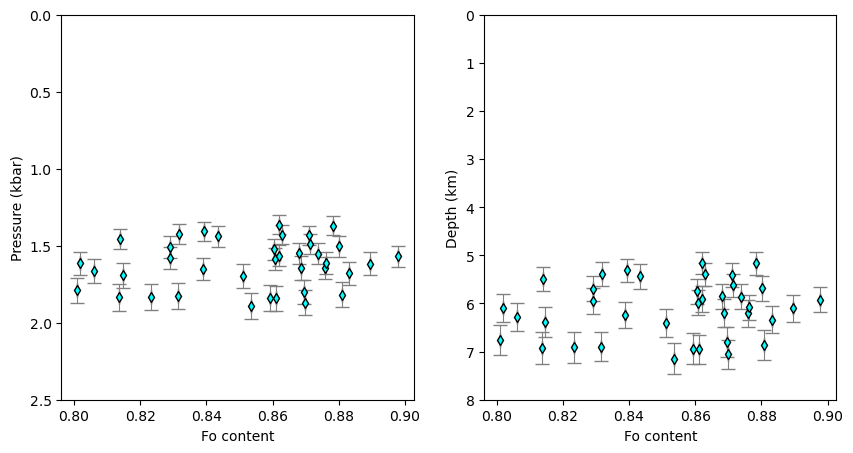

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO$_2$ Density
- Lets say the uncertainty in CO$_2$ density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.595536,1.591351,0.233460,6.023845,6.008046,0.881415,0,10,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.436573,1.429249,0.205108,5.423691,5.396040,0.774374,0,10,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.687168,1.675066,0.256657,6.369795,6.324106,0.968994,0,10,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.898085,1.882363,0.291145,7.166101,7.106745,1.099199,0,10,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.810930,1.793463,0.281081,6.837052,6.771106,1.061205,0,10,0.0,1307.970102,0.482227,None,2700,SW96


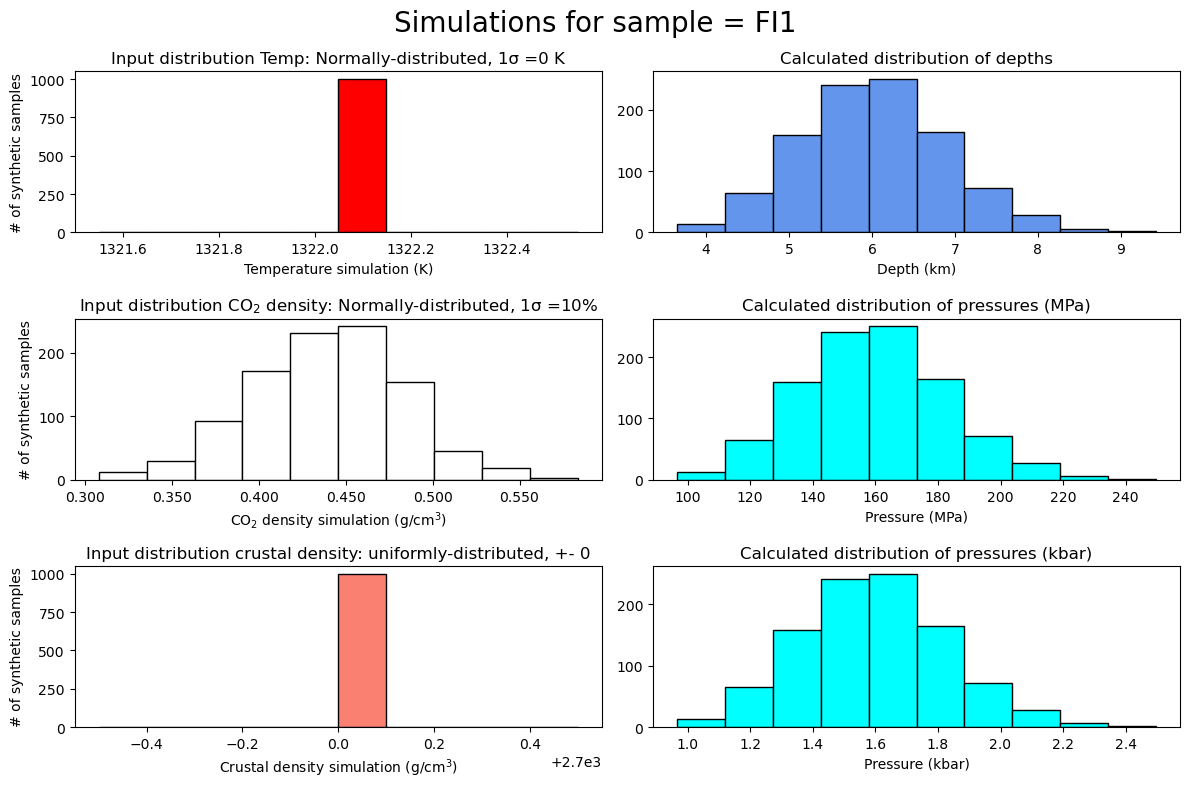

In [6]:
MC_Av_rhoonly, MC_All_rhoonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rhoonly.head()

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.573131,1.566844,0.111360,5.939256,5.915520,0.420432,30,0.02,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.426266,1.421368,0.106045,5.384776,5.366287,0.400368,30,0.02,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.687557,1.683224,0.121154,6.371266,6.354906,0.457408,30,0.02,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.864643,1.860077,0.129075,7.039842,7.022605,0.487314,30,0.02,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.804404,1.801820,0.127257,6.812416,6.802659,0.480451,30,0.02,0.0,1307.970102,0.482227,None,2700,SW96


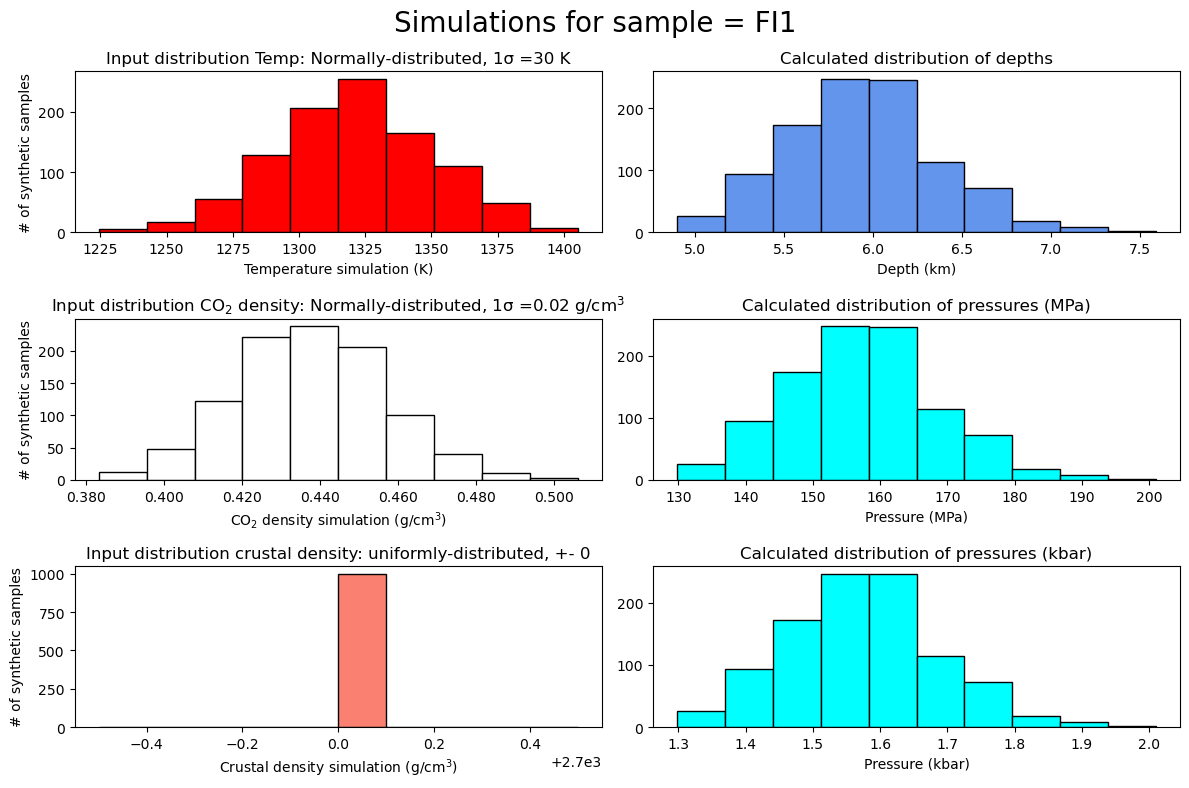

In [7]:
MC_Av_rho_T, MC_All_rho_T, fig=pf.propagate_FI_uncertainty(
T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()

## Uncertainty in Temp, CO$_2$ and Crustal density
- Here we also add a 5% uncertainty in crustal density.

working on sample number 0
working on sample number 20


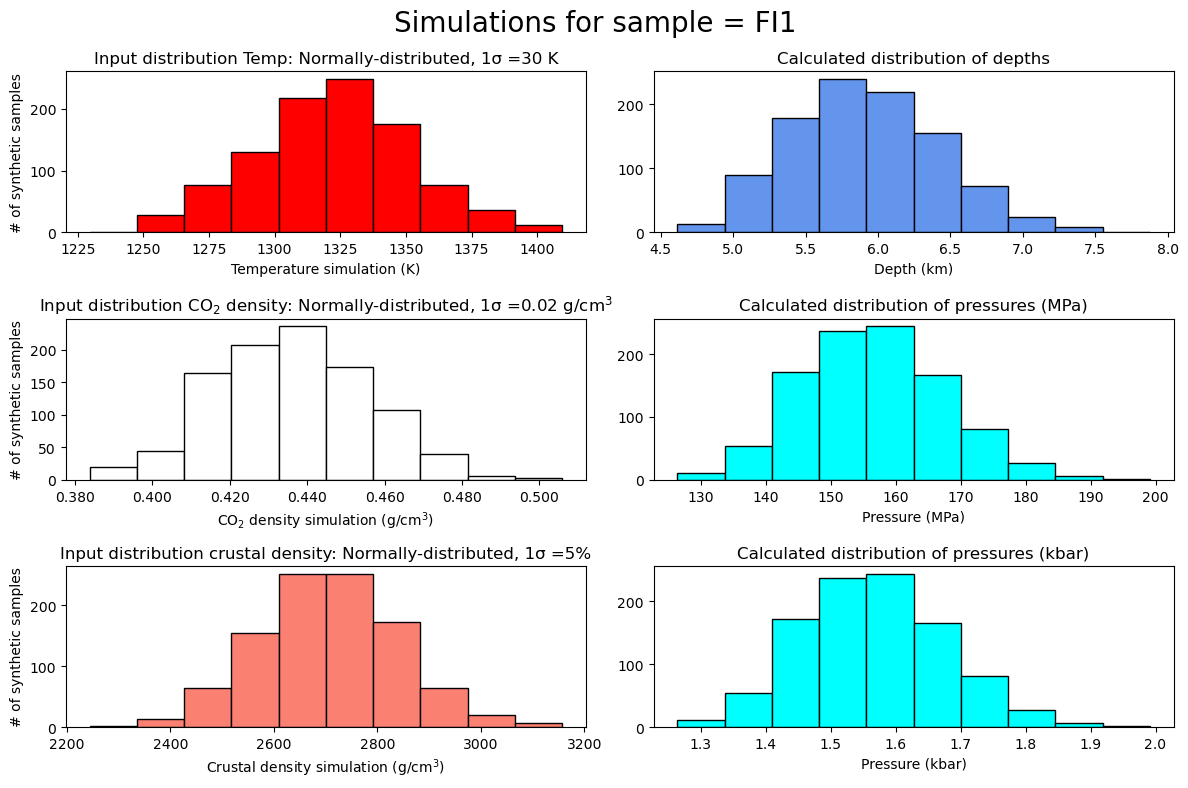

In [8]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CD.head()

fig.savefig('MonteCarlo_Sample1_png', dpi=300)

In [9]:
MC_All_rho_T_CD.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,FI1,1.356265,135.626525,5.039957,2743.145017,None,1345.608914,0.389809
1,FI1,1.576721,157.672053,5.967963,2693.144004,None,1296.859635,0.445102
2,FI1,1.724389,172.438927,6.539925,2687.778756,None,1312.597336,0.467732
3,FI1,1.478909,147.890926,5.585080,2699.250219,None,1309.031823,0.423199
4,FI1,1.475552,147.555191,5.066310,2968.887542,None,1298.296864,0.425309


In [10]:
MC_Av_rho_T_CD

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.567418,1.563421,0.110128,5.915691,5.900788,0.508516,30,0.02,135.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.427425,1.423957,0.109251,5.409547,5.399756,0.500737,30,0.02,135.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.680958,1.673393,0.115838,6.380565,6.346367,0.571517,30,0.02,135.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.877284,1.870264,0.129928,7.122811,7.088974,0.607252,30,0.02,135.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.813986,1.813280,0.125563,6.847949,6.792129,0.603077,30,0.02,135.0,1307.970102,0.482227,None,2700,SW96
5,FI9,0.490442,6.954312,1.841989,1.845228,1.843879,0.126966,6.963239,6.933700,0.579494,30,0.02,135.0,1303.661132,0.490442,None,2700,SW96
6,FI11,0.453781,6.207481,1.644175,1.645639,1.641328,0.122165,6.215856,6.210743,0.543626,30,0.02,135.0,1311.100560,0.453781,None,2700,SW96
7,FI13,0.491932,6.895131,1.826313,1.828912,1.823421,0.127796,6.907516,6.869583,0.610848,30,0.02,135.0,1288.892022,0.491932,None,2700,SW96
8,FI15,0.444918,5.985014,1.585251,1.586938,1.584250,0.108927,6.017122,6.003658,0.505110,30,0.02,135.0,1303.569940,0.444918,None,2700,SW96
9,FI17,0.496043,6.929894,1.835521,1.845525,1.842263,0.125948,6.993917,6.971927,0.584902,30,0.02,135.0,1279.968166,0.496043,None,2700,SW96


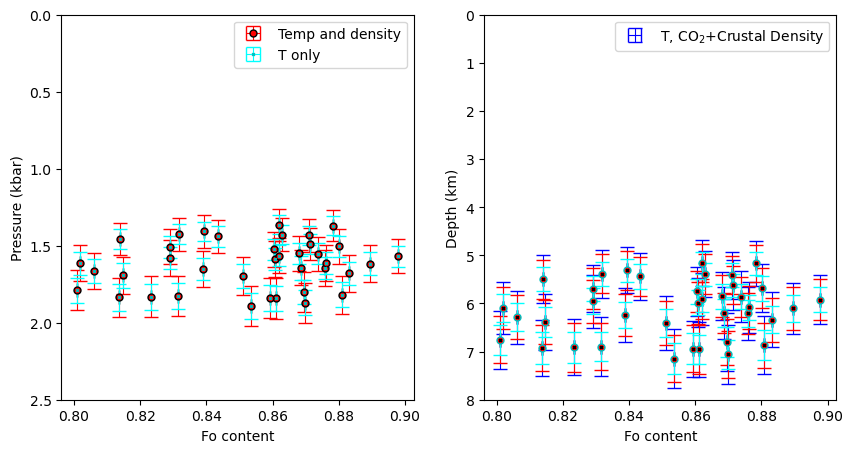

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T_CD['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T_CD['std_dev_MC_D_km'],
             fmt='o', ecolor='b', elinewidth=0.8, mfc='b', ms=0, mec='b', capsize=5,
            label='T, CO$_2$+Crustal Density')
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_P_kbar'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=5,
             label='Temp and density')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_D_km'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='c', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='c', capsize=5,
            label='T only')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')
ax2.legend()
ax1.legend()
ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()